In [4]:
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os

from models.RABClassNet import RABClassNet 
from manager.manager import TrainingManager 
from optimizers.Adasecant import AdaSecant  
from utils import set_seed, generate_confusion_matrices

Files already downloaded and verified

Training with optimizer: AdaSecant_decay95
Epoch [1/15], Train Loss: 1.6104, Val Loss: 1.4528
Epoch [2/15], Train Loss: 1.2725, Val Loss: 1.1833
Epoch [3/15], Train Loss: 1.1237, Val Loss: 1.0723
Epoch [4/15], Train Loss: 1.0220, Val Loss: 0.8833
Epoch [5/15], Train Loss: 0.9371, Val Loss: 0.8487
Epoch [6/15], Train Loss: 0.8746, Val Loss: 0.7796
Epoch [7/15], Train Loss: 0.8215, Val Loss: 0.7399
Epoch [8/15], Train Loss: 0.7803, Val Loss: 0.7952
Epoch [9/15], Train Loss: 0.7384, Val Loss: 0.7568
Epoch [10/15], Train Loss: 0.7086, Val Loss: 0.7203
Epoch [11/15], Train Loss: 0.6709, Val Loss: 0.7679
Epoch [12/15], Train Loss: 0.6413, Val Loss: 0.7206
Epoch [13/15], Train Loss: 0.6170, Val Loss: 0.7213
Epoch [14/15], Train Loss: 0.6024, Val Loss: 0.7238
Epoch [15/15], Train Loss: 0.5779, Val Loss: 0.6976

Training with optimizer: AdaSecant_decay90
Epoch [1/15], Train Loss: 1.5891, Val Loss: 1.4055
Epoch [2/15], Train Loss: 1.2890, Val Loss: 1.1549
E

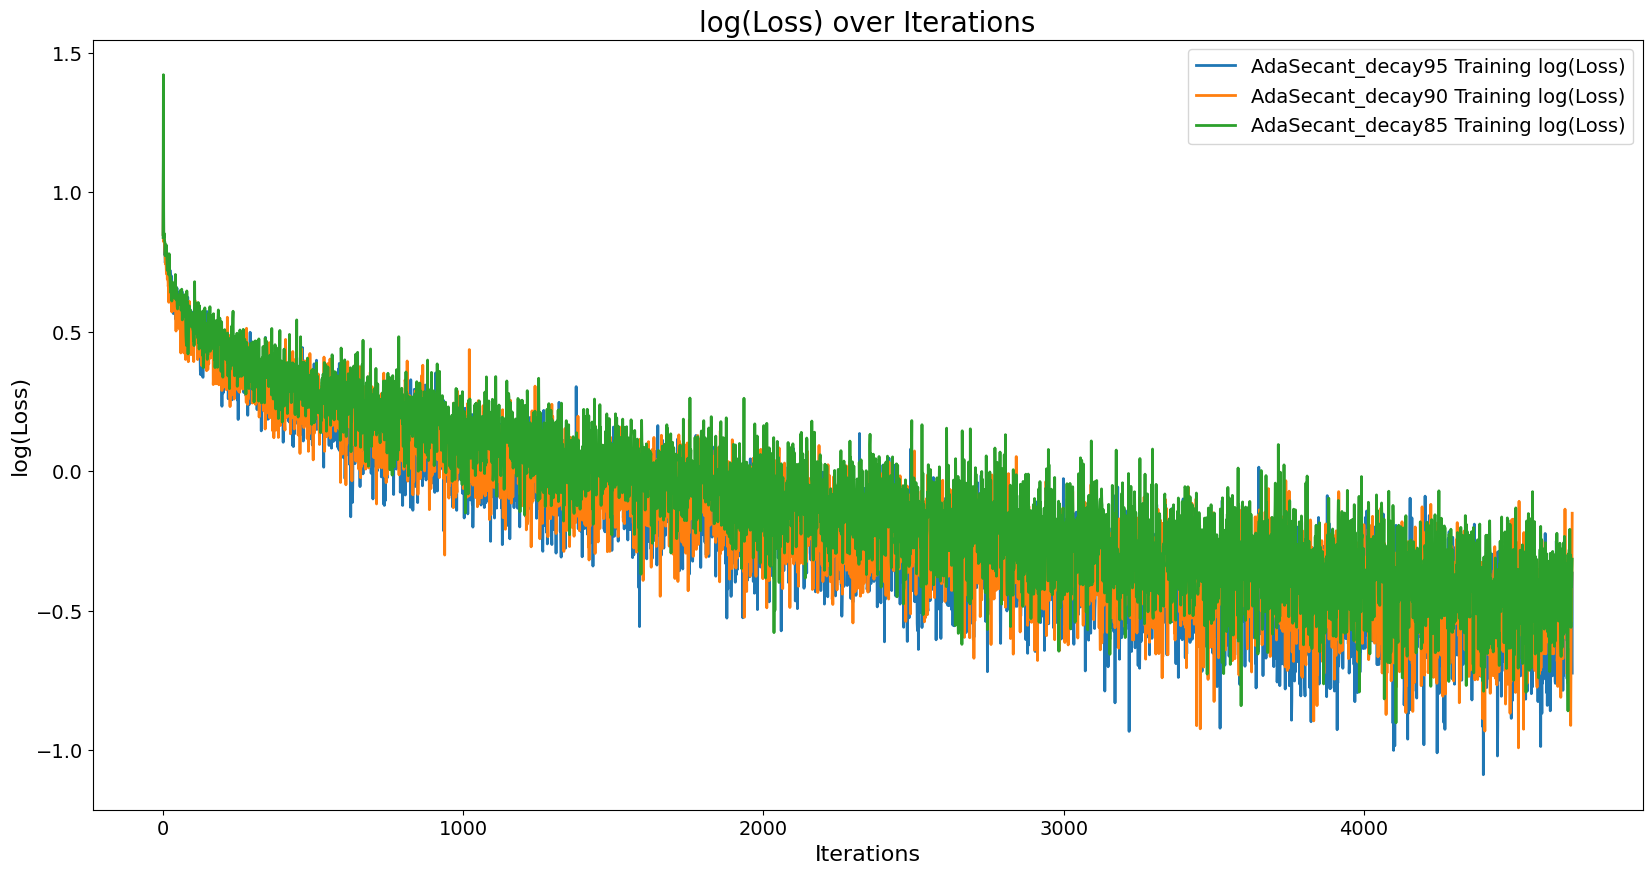

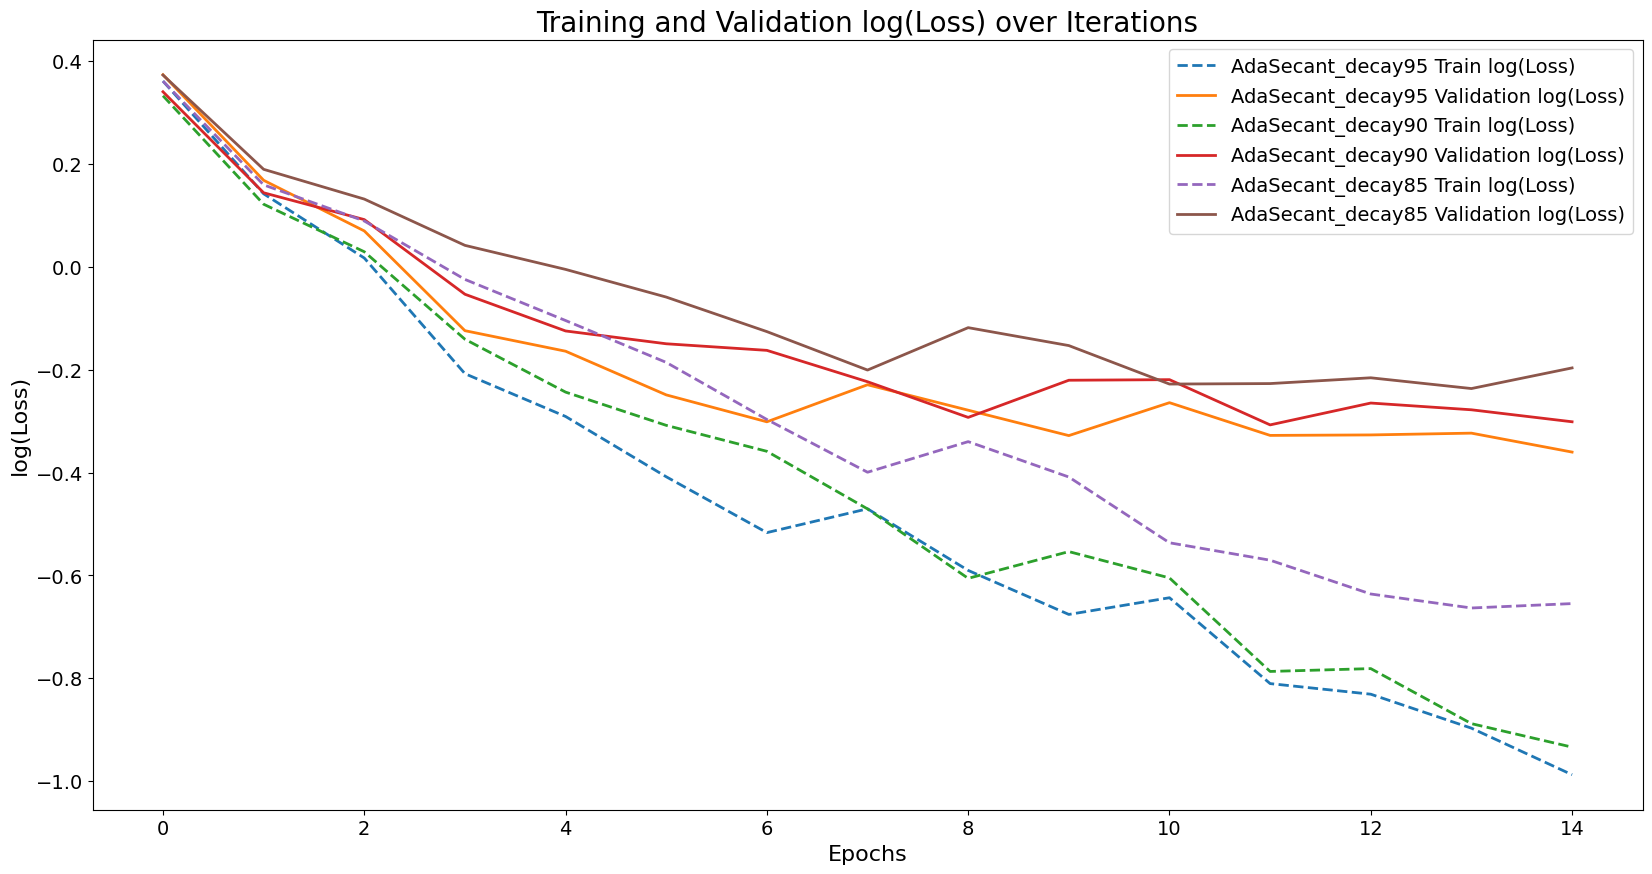

Metric of the model with AdaSecant_decay95 optimizer on the test set: 75.95
Metric of the model with AdaSecant_decay90 optimizer on the test set: 74.79
Metric of the model with AdaSecant_decay85 optimizer on the test set: 72.57


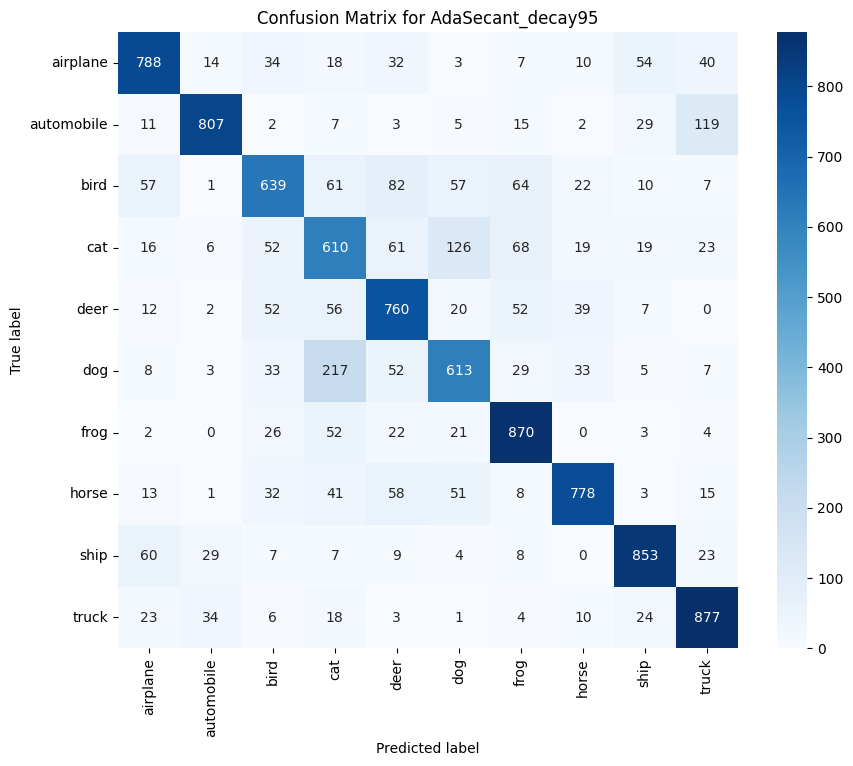

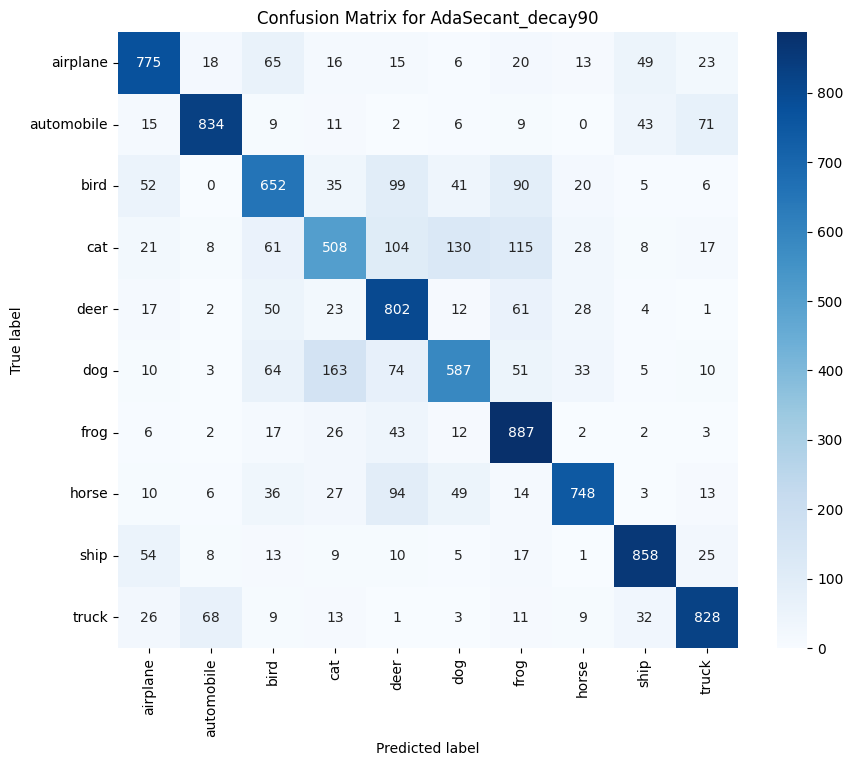

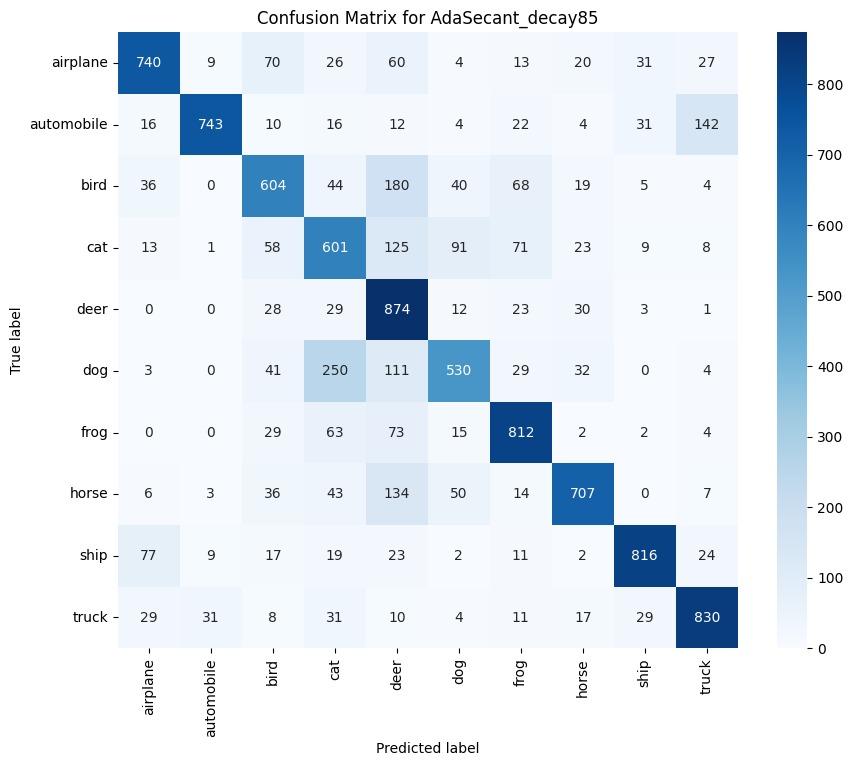

In [5]:
set_seed(45)

experiment_path = "./experiments/cifar_experiment3"
if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)

# Loading the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, transform=transform)

# Spliting the train dataset into train and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Creating DataLoader for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

criterion = nn.CrossEntropyLoss()

optimizers = {
    'AdaSecant_decay95': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=1.8),
    'AdaSecant_decay90': lambda params: AdaSecant(params, decay=0.90, use_adagrad=True, damping=1e-7, gamma_clip=1.8),
    'AdaSecant_decay85': lambda params: AdaSecant(params, decay=0.85, use_adagrad=True, damping=1e-7, gamma_clip=1.8),
}

manager = TrainingManager(lambda: RABClassNet((3, 32, 32), 10), criterion, optimizers, train_loader, val_loader, test_loader, num_epochs=15)
manager.train()
manager.plot_loss(experiment_path)
manager.plot_train_val_loss(experiment_path)
trained_models = manager.models
metrics = manager.calculate_metrics(experiment_path)
generate_confusion_matrices(trained_models, test_loader, test_dataset.classes, experiment_path)

Files already downloaded and verified

Training with optimizer: AdaSecant_gc1
Epoch [1/15], Train Loss: 1.6466, Val Loss: 1.3969
Epoch [2/15], Train Loss: 1.3200, Val Loss: 1.1529
Epoch [3/15], Train Loss: 1.1628, Val Loss: 1.1063
Epoch [4/15], Train Loss: 1.0501, Val Loss: 0.9480
Epoch [5/15], Train Loss: 0.9663, Val Loss: 0.9163
Epoch [6/15], Train Loss: 0.9056, Val Loss: 0.8323
Epoch [7/15], Train Loss: 0.8524, Val Loss: 0.7786
Epoch [8/15], Train Loss: 0.8096, Val Loss: 0.8058
Epoch [9/15], Train Loss: 0.7713, Val Loss: 0.7590
Epoch [10/15], Train Loss: 0.7336, Val Loss: 0.7443
Epoch [11/15], Train Loss: 0.7102, Val Loss: 0.7566
Epoch [12/15], Train Loss: 0.6788, Val Loss: 0.7378
Epoch [13/15], Train Loss: 0.6485, Val Loss: 0.7103
Epoch [14/15], Train Loss: 0.6319, Val Loss: 0.7251
Epoch [15/15], Train Loss: 0.6033, Val Loss: 0.7353

Training with optimizer: AdaSecant_gc18
Epoch [1/15], Train Loss: 1.5914, Val Loss: 1.3714
Epoch [2/15], Train Loss: 1.2857, Val Loss: 1.1012
Epoch [3

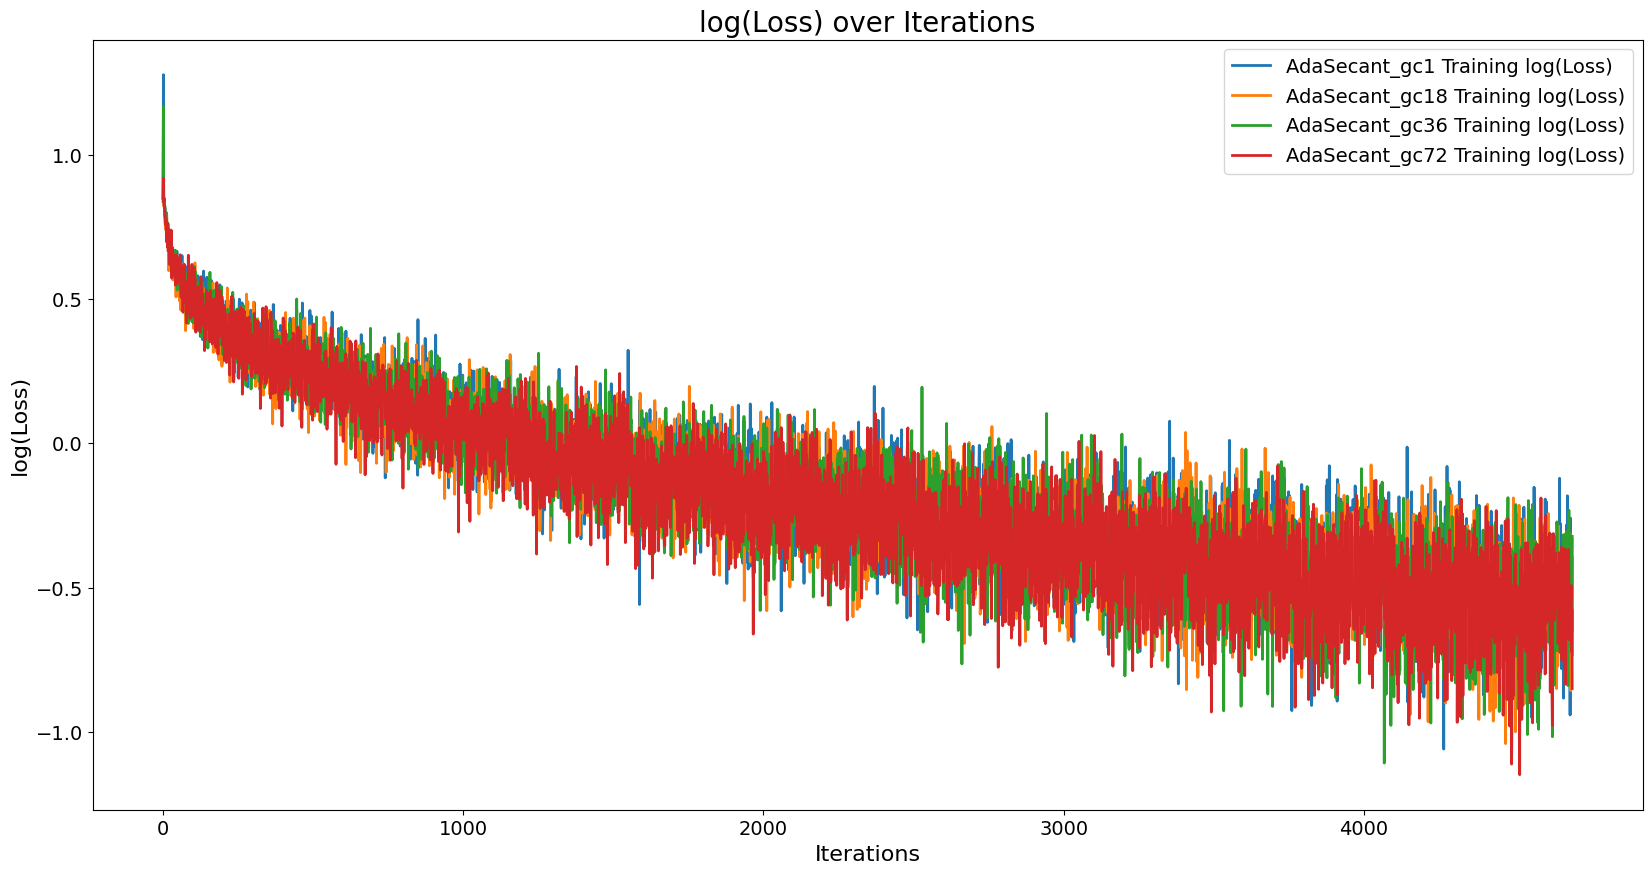

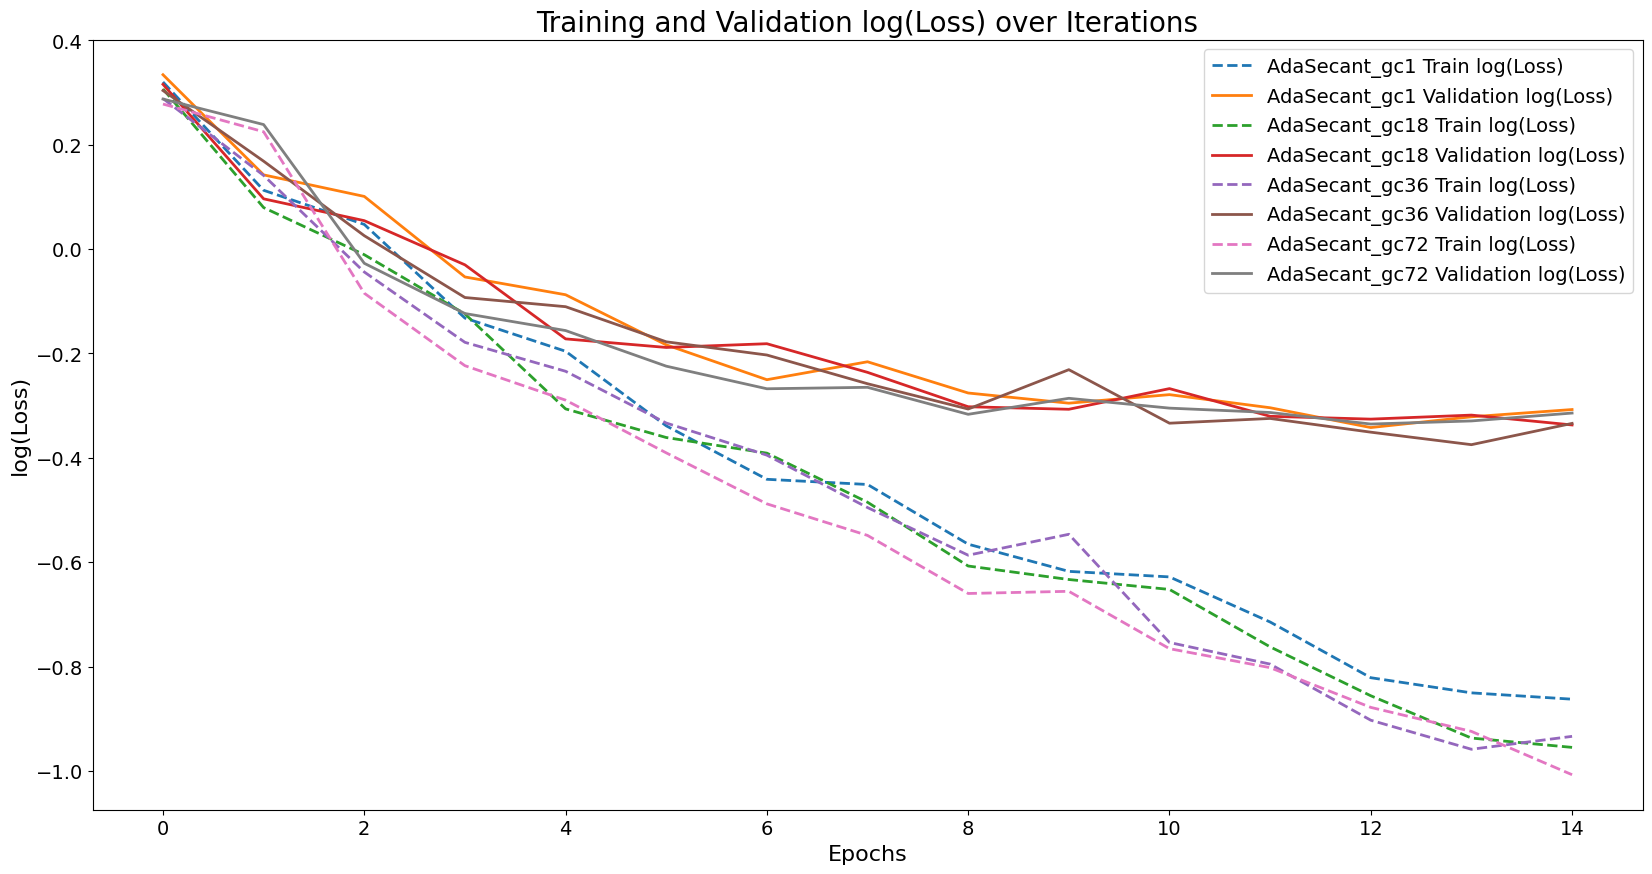

Metric of the model with AdaSecant_gc1 optimizer on the test set: 74.42
Metric of the model with AdaSecant_gc18 optimizer on the test set: 75.74
Metric of the model with AdaSecant_gc36 optimizer on the test set: 75.24
Metric of the model with AdaSecant_gc72 optimizer on the test set: 75.90


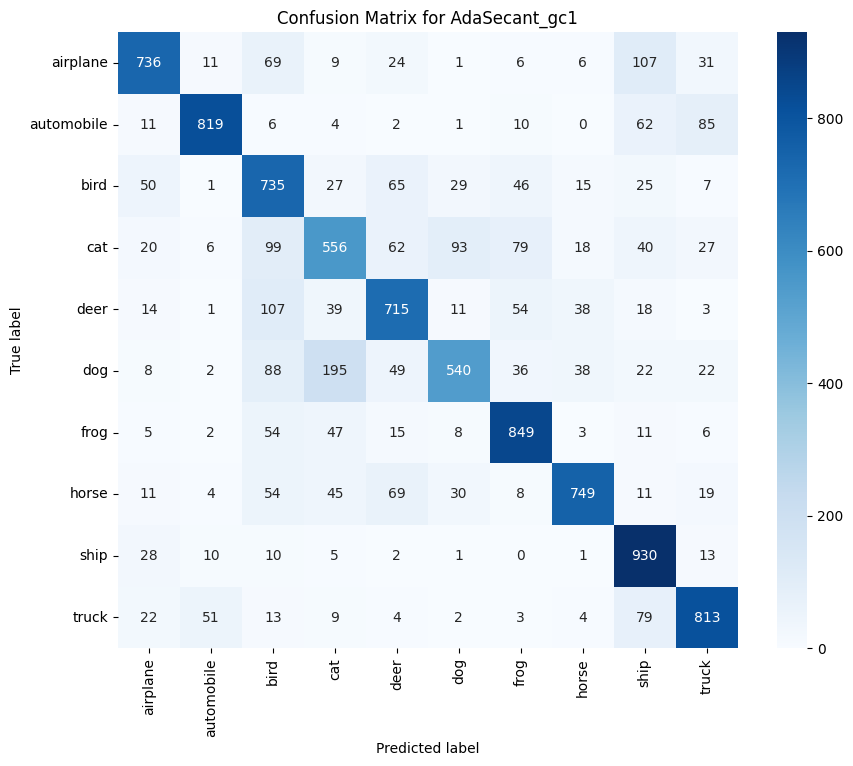

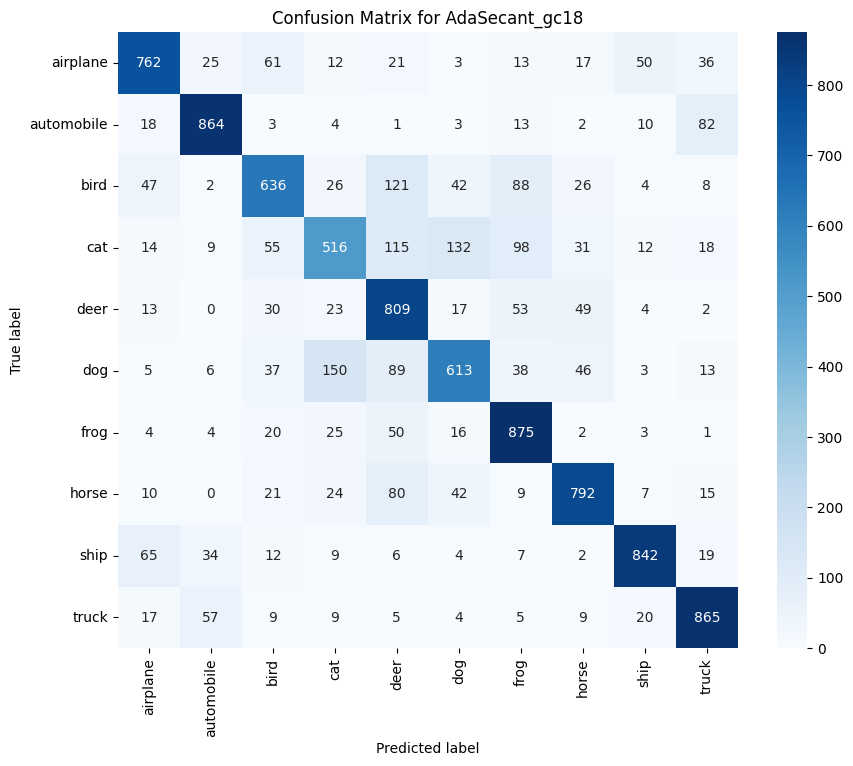

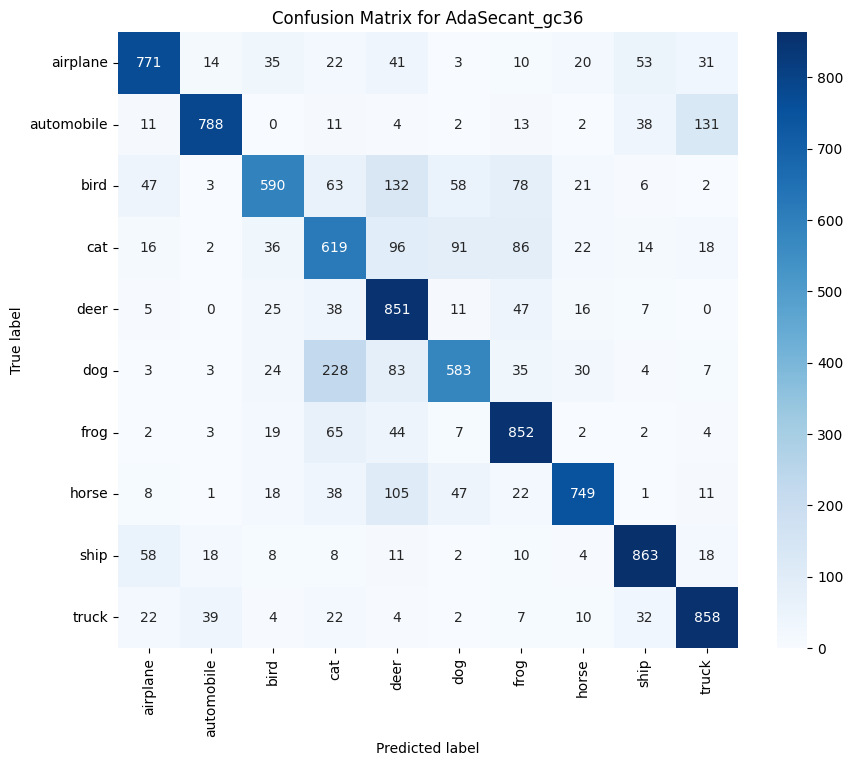

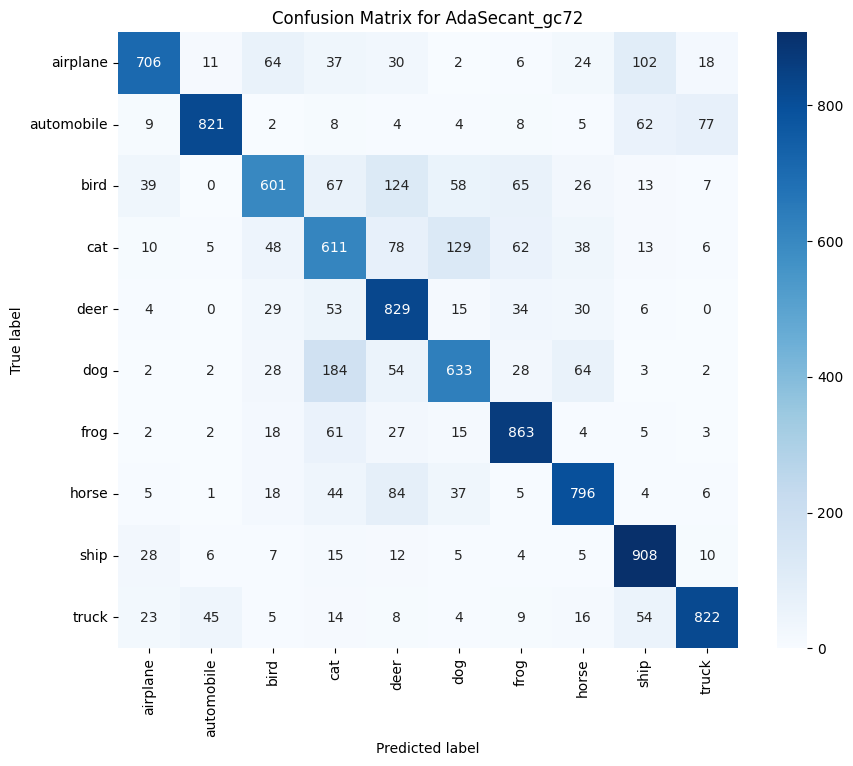

In [8]:
set_seed(45)

experiment_path = "./experiments/cifar_experiment3_2"
if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)

# Loading the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, transform=transform)

# Spliting the train dataset into train and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Creating DataLoader for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

criterion = nn.CrossEntropyLoss()

optimizers = {
    'AdaSecant_gc1': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=0.9),
    'AdaSecant_gc18': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=1.8),
    'AdaSecant_gc36': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=3.6),
    'AdaSecant_gc72': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=7.2),
}

manager = TrainingManager(lambda: RABClassNet((3, 32, 32), 10), criterion, optimizers, train_loader, val_loader, test_loader, num_epochs=15)
manager.train()
manager.plot_loss(experiment_path)
manager.plot_train_val_loss(experiment_path)
trained_models = manager.models
metrics = manager.calculate_metrics(experiment_path)
generate_confusion_matrices(trained_models, test_loader, test_dataset.classes, experiment_path)

Files already downloaded and verified

Training with optimizer: AdaSecant_svr0
Epoch [1/15], Train Loss: 1.6286, Val Loss: 1.3200
Epoch [2/15], Train Loss: 1.2938, Val Loss: 1.1910
Epoch [3/15], Train Loss: 1.1449, Val Loss: 1.0663
Epoch [4/15], Train Loss: 1.0382, Val Loss: 1.0111
Epoch [5/15], Train Loss: 0.9559, Val Loss: 0.9273
Epoch [6/15], Train Loss: 0.8870, Val Loss: 0.8768
Epoch [7/15], Train Loss: 0.8402, Val Loss: 0.8414
Epoch [8/15], Train Loss: 0.7934, Val Loss: 0.7910
Epoch [9/15], Train Loss: 0.7597, Val Loss: 0.7558
Epoch [10/15], Train Loss: 0.7256, Val Loss: 0.7283
Epoch [11/15], Train Loss: 0.6903, Val Loss: 0.7281
Epoch [12/15], Train Loss: 0.6652, Val Loss: 0.7355
Epoch [13/15], Train Loss: 0.6402, Val Loss: 0.7313
Epoch [14/15], Train Loss: 0.6210, Val Loss: 0.7231
Epoch [15/15], Train Loss: 0.5870, Val Loss: 0.7068

Training with optimizer: AdaSecant_svr5
Epoch [1/15], Train Loss: 4.4888, Val Loss: 1.6172
Epoch [2/15], Train Loss: 1.5703, Val Loss: 1.4764
Epoch [

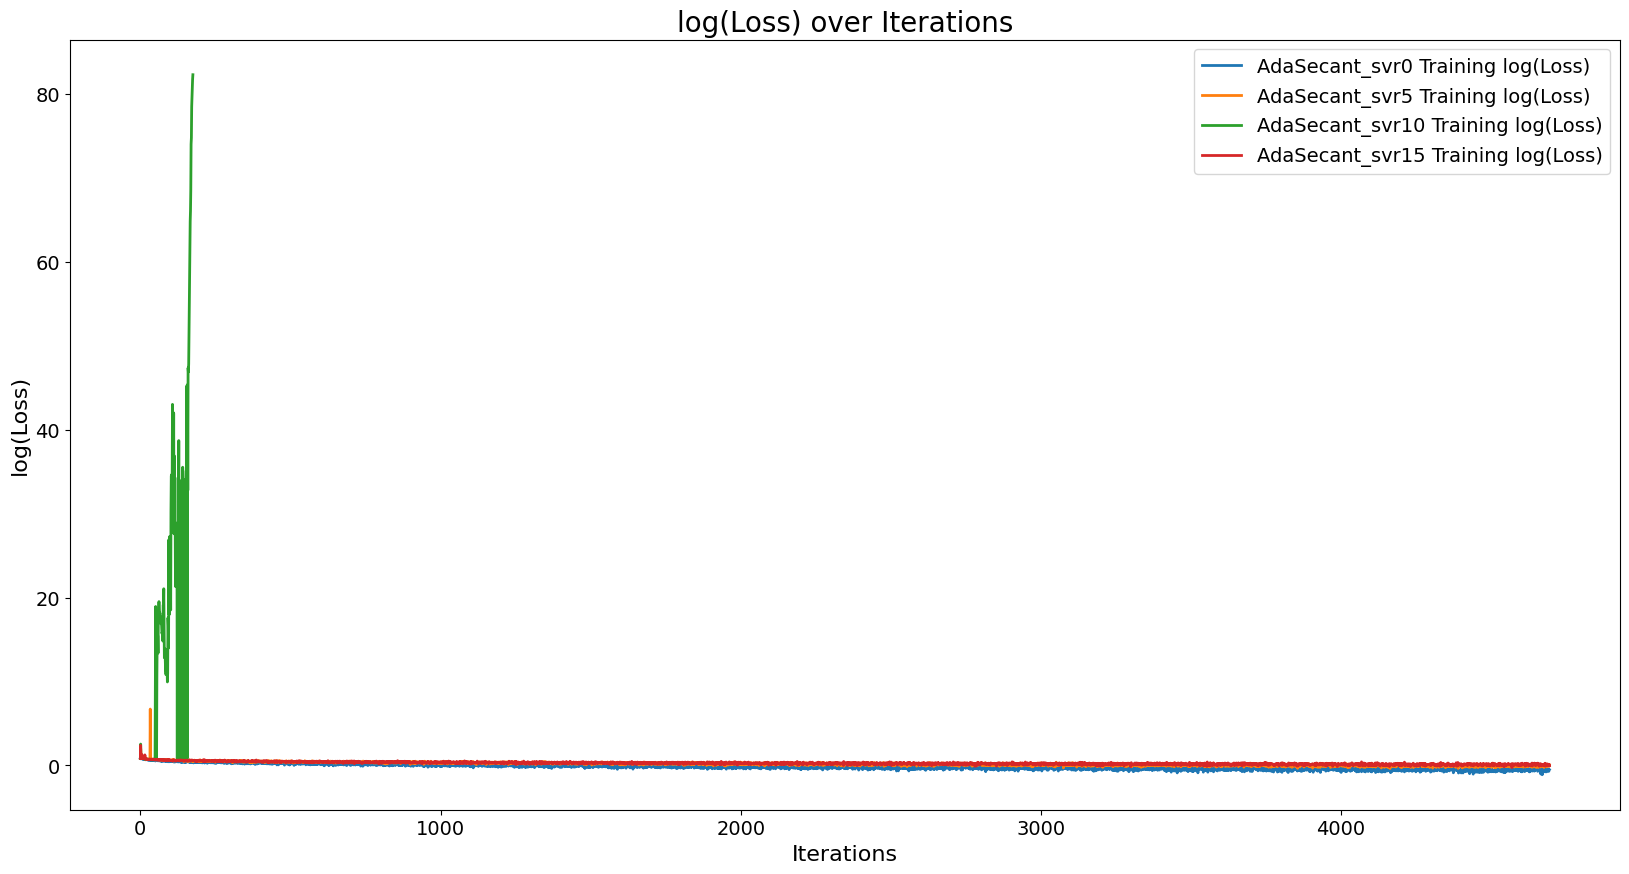

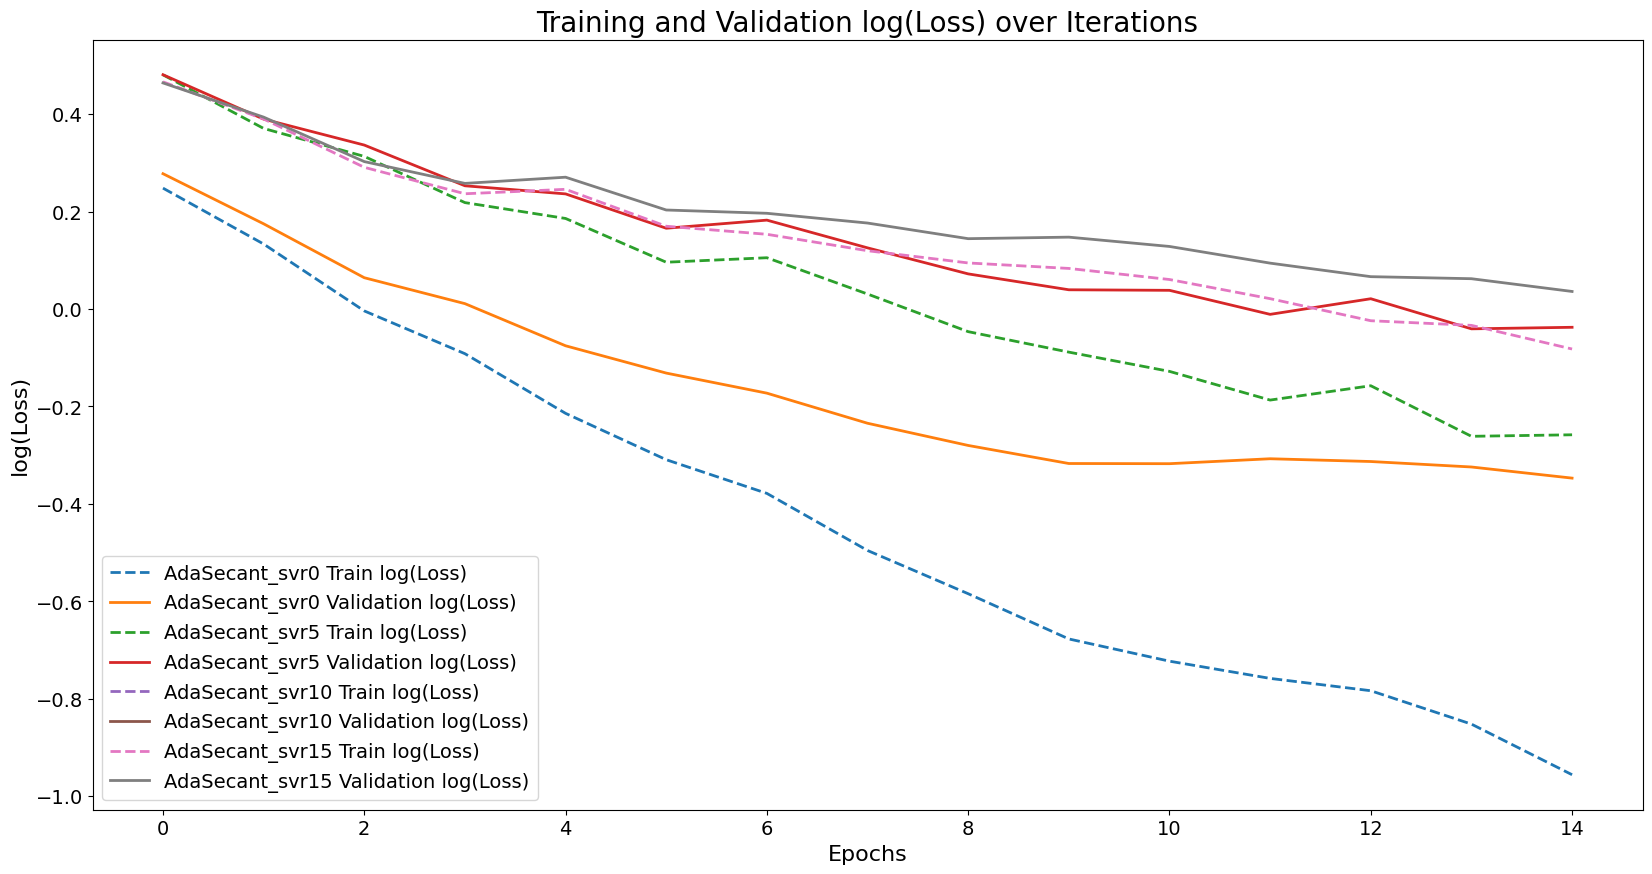

Metric of the model with AdaSecant_svr0 optimizer on the test set: 75.73
Metric of the model with AdaSecant_svr5 optimizer on the test set: 65.93
Metric of the model with AdaSecant_svr10 optimizer on the test set: 7.69
Metric of the model with AdaSecant_svr15 optimizer on the test set: 63.38


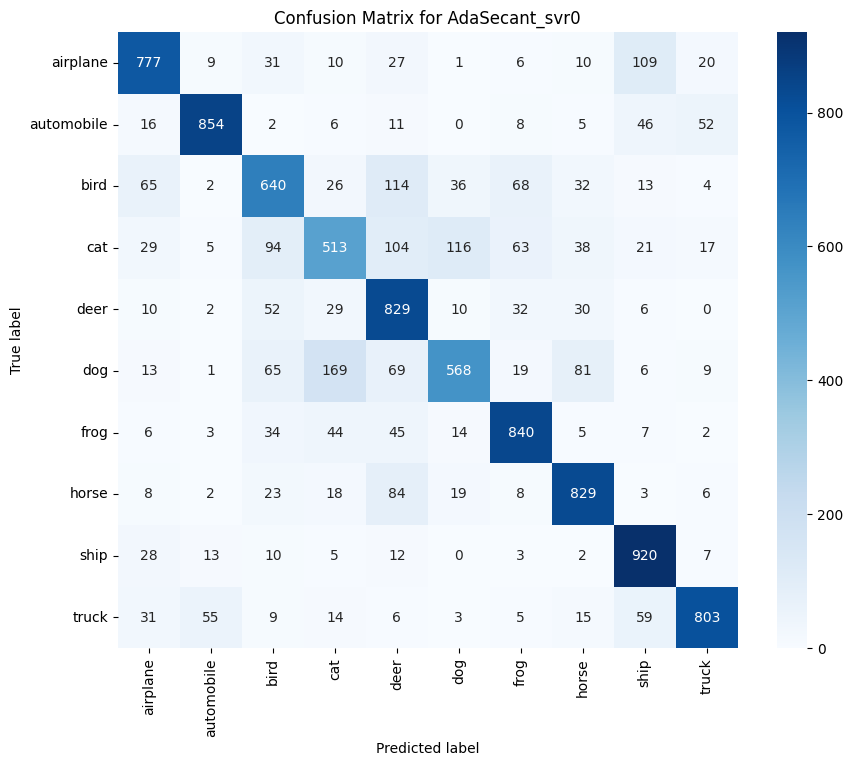

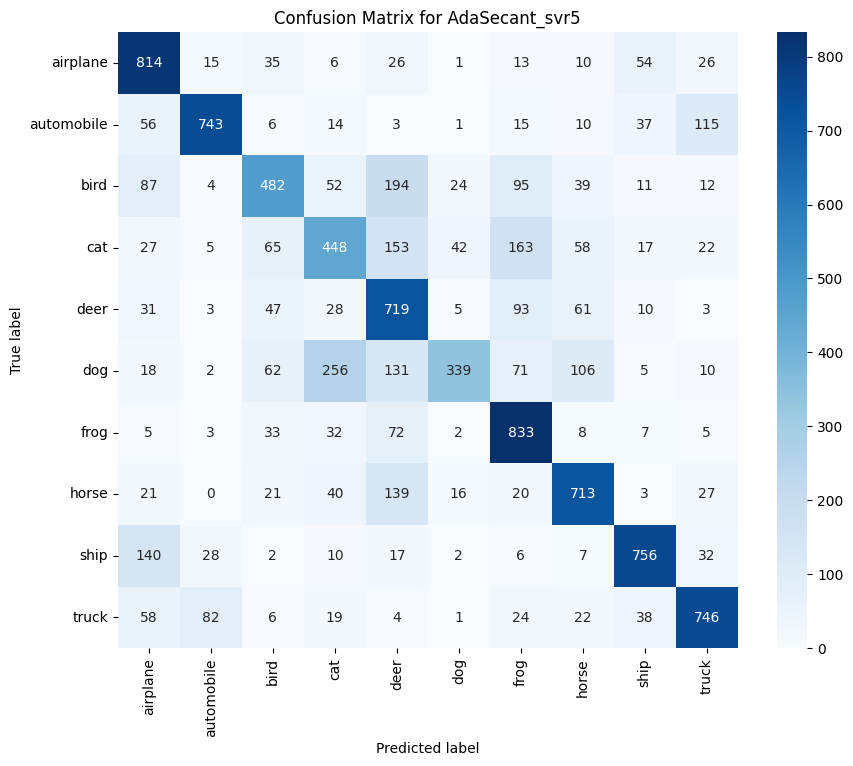

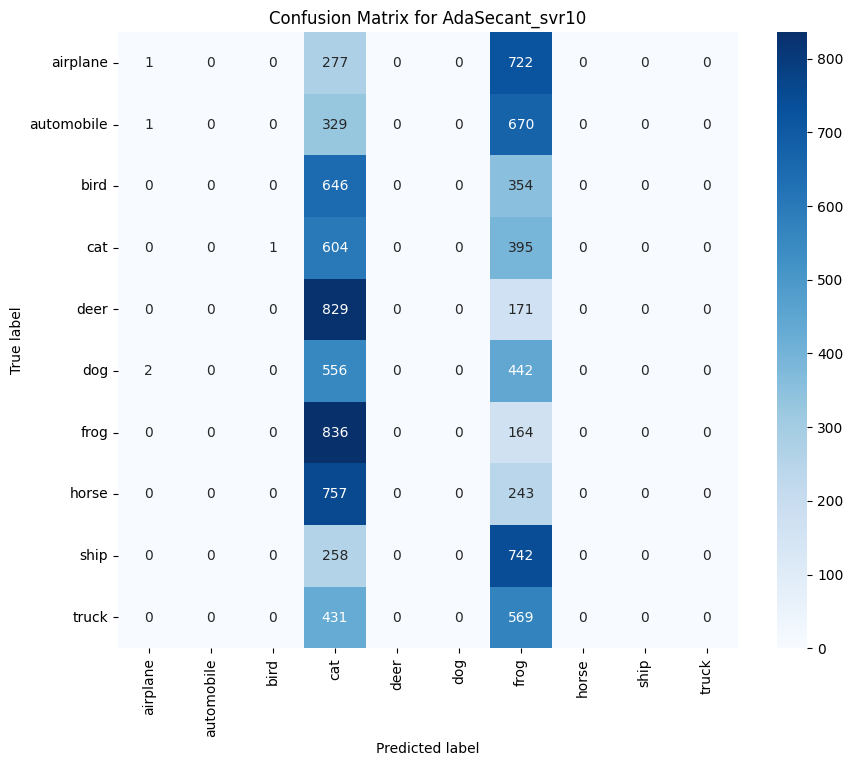

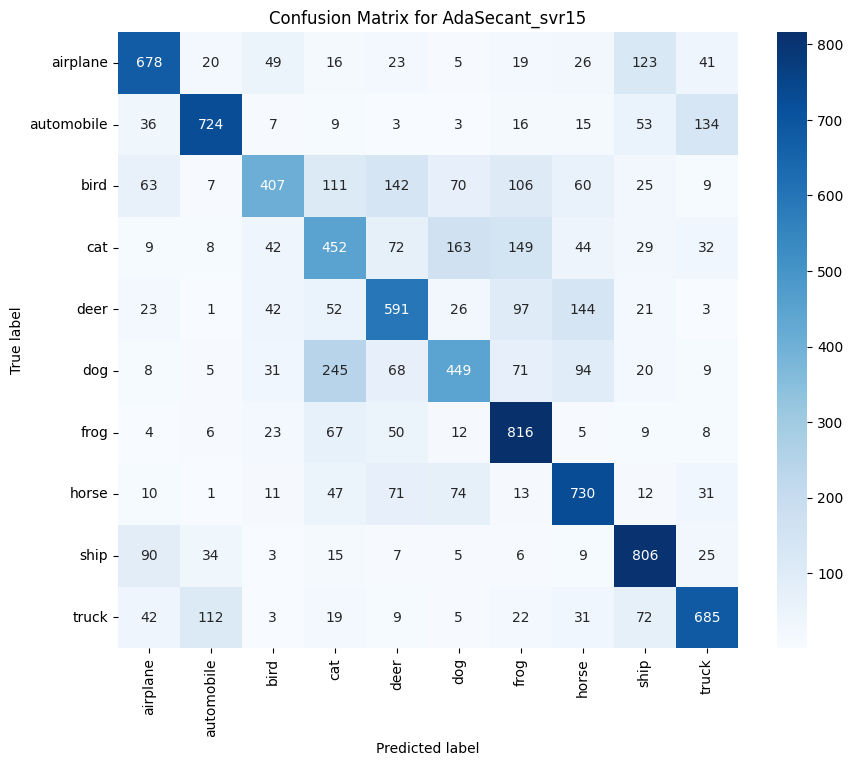

In [11]:
set_seed(44)

experiment_path = "./experiments/cifar_experiment3_3"
if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)

# Loading the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, transform=transform)

# Spliting the train dataset into train and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Creating DataLoader for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

criterion = nn.CrossEntropyLoss()

optimizers = {
    'AdaSecant_svr0': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=1.8, start_var_reduction=0),
    'AdaSecant_svr5': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=1.8, start_var_reduction=5),
    'AdaSecant_svr10': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=1.8, start_var_reduction=10),
    'AdaSecant_svr15': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=1.8, start_var_reduction=15),
}

manager = TrainingManager(lambda: RABClassNet((3, 32, 32), 10), criterion, optimizers, train_loader, val_loader, test_loader, num_epochs=15)
manager.train()
manager.plot_loss(experiment_path)
manager.plot_train_val_loss(experiment_path)
trained_models = manager.models
metrics = manager.calculate_metrics(experiment_path)
generate_confusion_matrices(trained_models, test_loader, test_dataset.classes, experiment_path)